# Notebook updated by Keith – minor formatting test

# EDA Housing Project 1 – King County Housing Data

This notebook explores the King County Housing dataset (home sales in King County, USA).

Goals:
- Understand the structure and quality of the data.
- Explore key drivers of house prices.
- Validate a set of hypotheses.
- Prepare insights and recommendations for a specific client.

We follow this EDA checklist:

1. Understanding  
2. Hypotheses  
3. Explore  
4. Clean  
5. Relationships  
6. Back to the Hypotheses  
7. Fine Tune  
8. Explain  

In [96]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import PercentFormatter

# Plot & display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
})
plt.rcParams["figure.facecolor"] = "w"

sns.set(style="whitegrid")

In [97]:
# Replace filenames if needed

df = pd.read_csv("data/kc_house_sales_joined.csv")
df.head()

,sale_id,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,3,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,4,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,5,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


## 1. Understanding the Data

We check the structure, column names, and data types.


In [98]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sale_id        21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   house_id       21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [99]:
df.isna().sum().sort_values(ascending=False).head(20)

yr_renovated     3848
waterfront       2391
sqft_basement     452
view               63
sale_id             0
grade               0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_above          0
condition           0
date                0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
house_id            0
dtype: int64

In [100]:
df.describe().transpose().head(20)

,count,mean,std,min,25%,50%,75%,max
sale_id,21597.000,10799.000,6234.661,1.000,5400.000,10799.000,16198.000,21597.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
house_id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,19206.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21534.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000


## 2. Research Questions and Hypotheses

**Research Question 1** – Does house size strongly influence sale price?

- **H1.1**: The larger the living area (`sqft_living`), the higher the price.
- **H1.2**: Houses with more bathrooms tend to sell for higher prices.

**Research Question 2** – Does renovation and overall “quality” affect price?

- **H2.1**: Renovated houses (`yr_renovated > 0`) sell for higher median prices than non-renovated houses.
- **H2.2**: Higher grade houses (`grade`) command significantly higher prices.

**Research Question 3 (Geographic)** – Does location within King County drive price differences?

- **H3.1**: Certain ZIP codes form “premium clusters” with much higher median prices than the county median.
- **H3.2**: Houses closer to the urban center (based on latitude/longitude) have higher prices.
- **H3.3**: Waterfront properties (`waterfront == 1`) have prices far above non-waterfront properties.


## 3. Explore the Data

We look for:
- Missing values  
- Outliers  
- Strange values  
- Distribution of key columns  


### Why we explore the raw data

Before cleaning or modeling, we explore the raw dataset to detect:
- distribution shapes,
- outliers,
- data-quality issues,
- and early signals that relate to our hypotheses.

These patterns are not final conclusions—they guide the cleaning strategy and help us understand which variables matter.

### Distributions of Key Variables

We inspect the distributions of price and the major size-related variables.  
This helps identify skew, long tails, and potential outliers that may distort relationships.

Most housing variables (price, sqft_living, lots) show **right-skew**, which is typical in real estate markets where a small number of luxury properties create long tails.

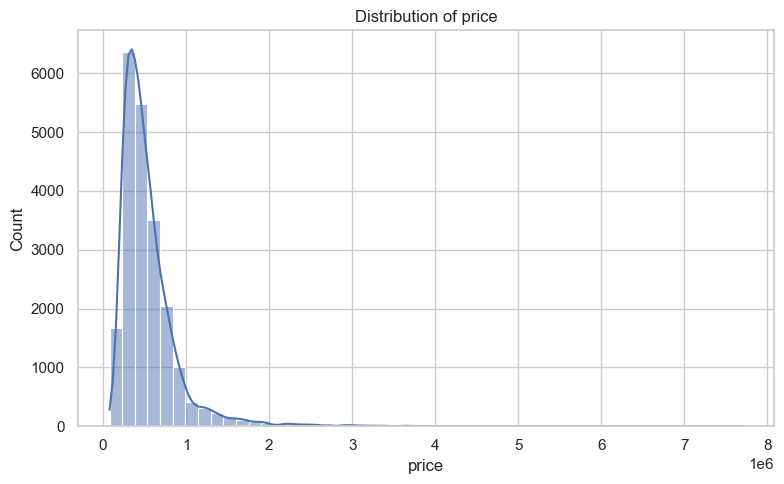

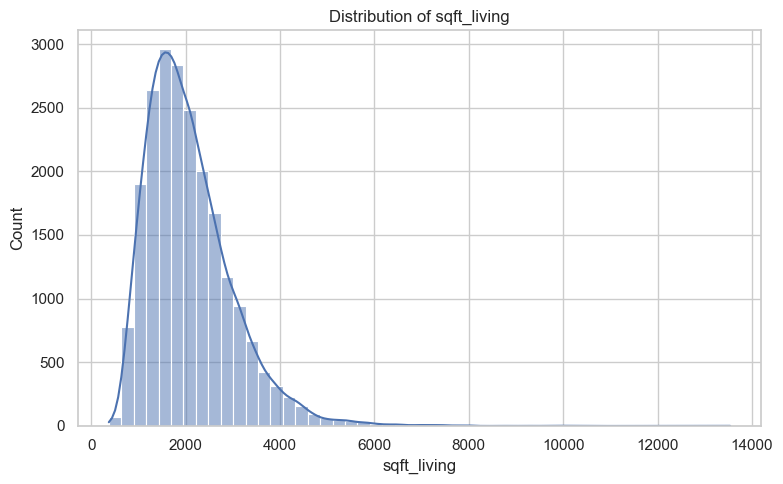

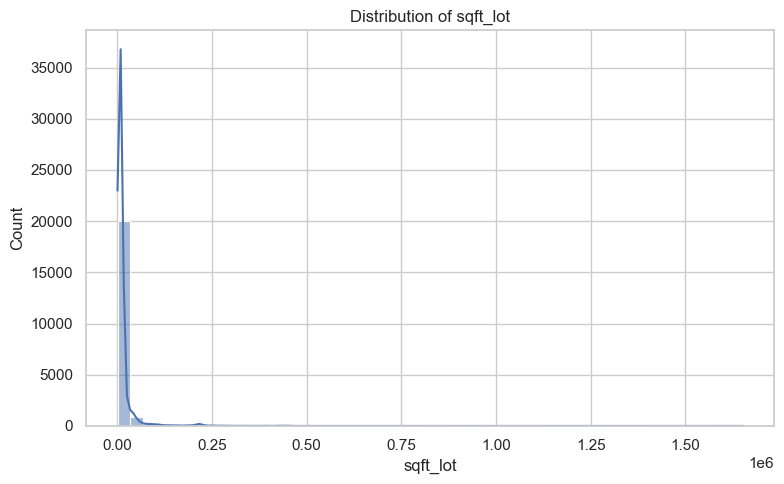

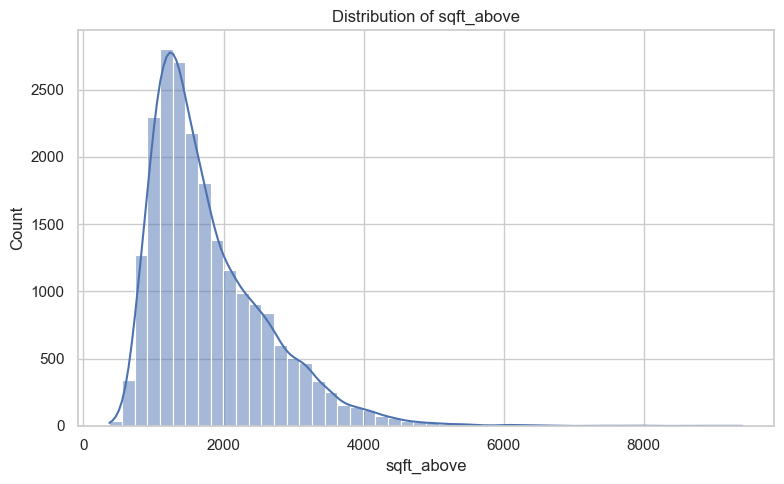

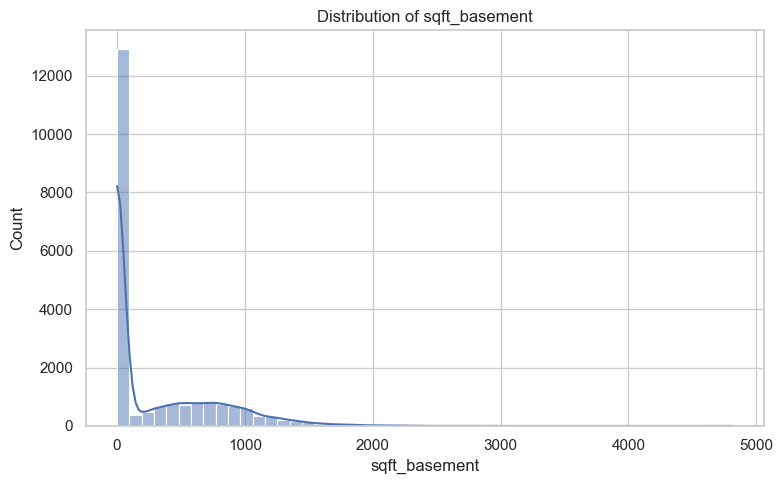

In [101]:
# Distributions of key continuous variables
continuous_cols = [
    'price', 'sqft_living', 'sqft_lot',
    'sqft_above', 'sqft_basement'
]

for col in continuous_cols:
    if col in df.columns:
        plt.figure()
        sns.histplot(df[col], bins=50, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

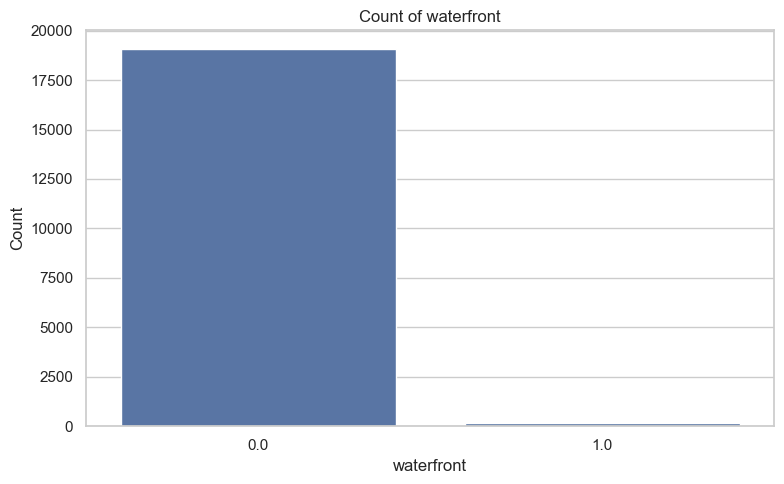

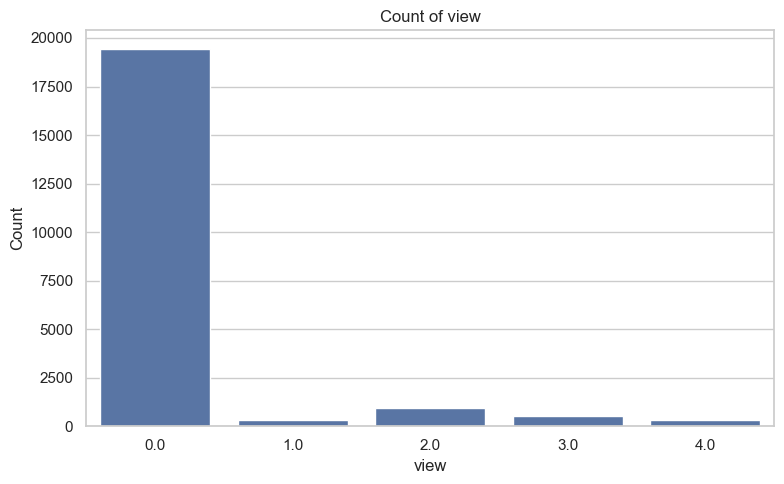

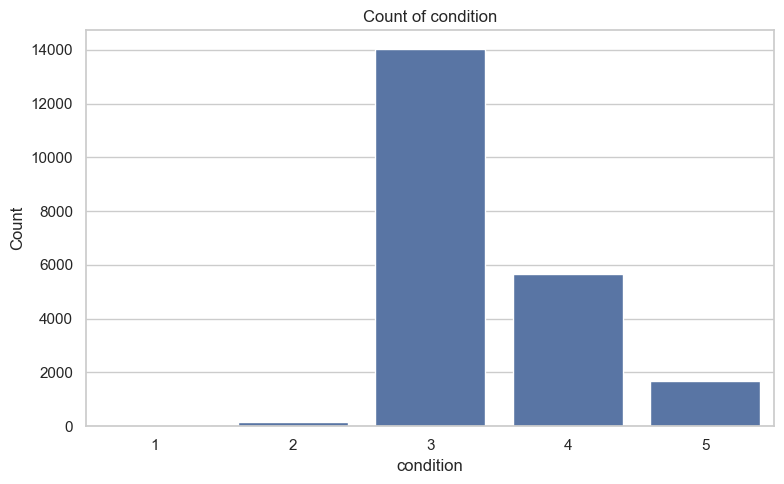

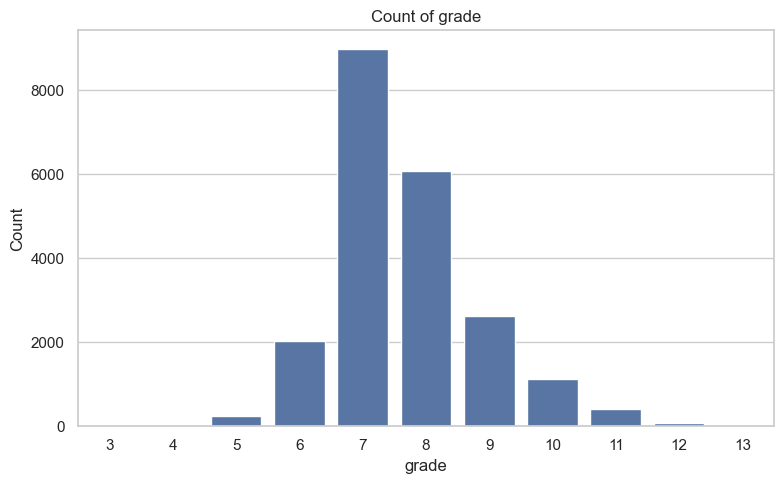

In [102]:
categorical_cols = ['waterfront', 'view', 'condition', 'grade']

for col in categorical_cols:
    if col in df.columns:
        plt.figure()
        sns.countplot(x=df[col])
        plt.title(f"Count of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

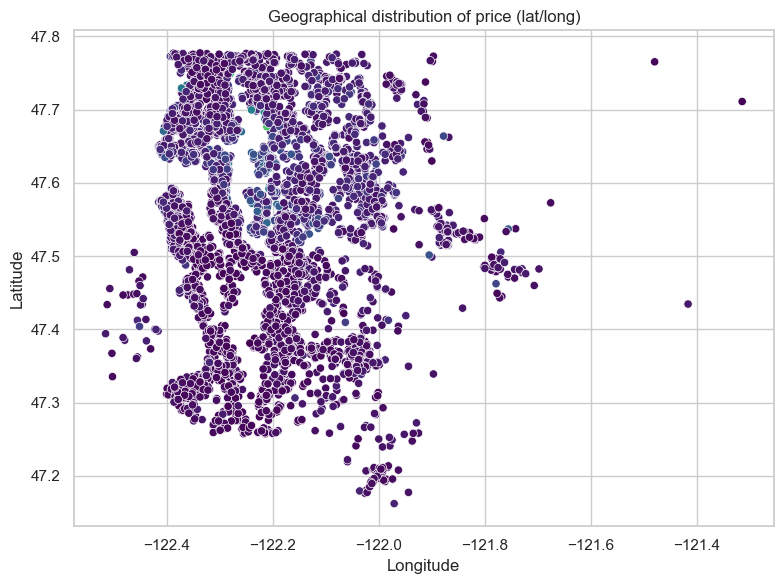

In [103]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df.sample(min(5000, len(df)), random_state=42),
    x='long', y='lat',
    hue='price',
    palette='viridis',
    legend=False
)
plt.title("Geographical distribution of price (lat/long)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

## 4. Cleaning the Data

### Rationale for Cleaning Decisions

1. **Dropped rows missing critical value columns**  
   Records without `price` or `sqft_living` cannot contribute to pricing analysis and would distort averages.

2. **Trimmed the top and bottom 1% of prices**  
   The raw data contains extreme outliers (e.g., luxury estates or distressed sales).  
   These observations have disproportionate influence on correlations and regressions.  
   Trimming the extreme 1% on each side retains the overall structure of the market while stabilizing the analysis.

3. **Created a log-transformed price (`log_price`)**  
   `price` is right-skewed; logging reduces skew, stabilizes variance, and makes relationships easier to interpret visually and statistically.


In [ ]:
# Check missing values again
df.isna().sum().sort_values(ascending=False).head(20)

#The missing-value pattern is unchanged for non-critical columns; only `price` and `sqft_living` are enforced for completeness in `df_clean`.

yr_renovated     3848
waterfront       2391
sqft_basement     452
view               63
sale_id             0
grade               0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_above          0
condition           0
date                0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
house_id            0
dtype: int64

In [105]:
# Basic cleaning

# 1. Drop rows with missing critical variables
df_clean = df.dropna(subset=['price', 'sqft_living']).copy()

# 2. Remove extreme outliers in price (1% tails)
lower_price = df_clean['price'].quantile(0.01)
upper_price = df_clean['price'].quantile(0.99)
df_clean = df_clean[(df_clean['price'] >= lower_price) & (df_clean['price'] <= upper_price)]

# 3. Log-transform price
df_clean['log_price'] = np.log(df_clean['price'])

df_clean.shape

(21168, 23)

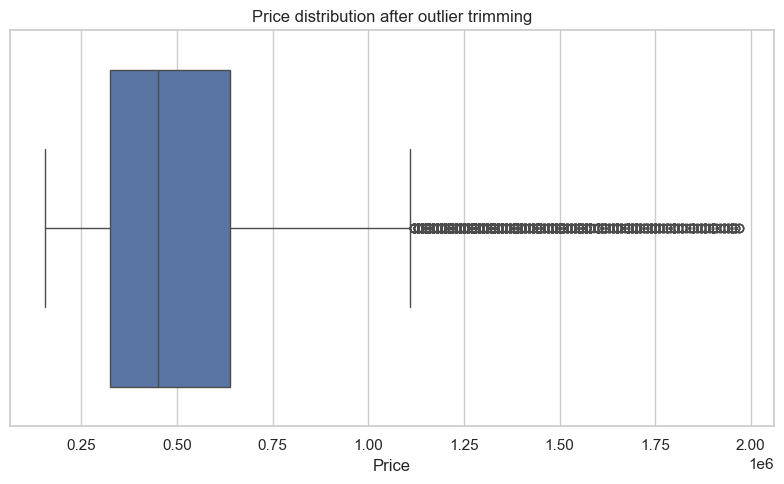

In [106]:
sns.boxplot(x=df_clean["price"])
plt.title("Price distribution after outlier trimming")
plt.xlabel("Price")
plt.tight_layout()
plt.show()

### Cleaning Decisions

- Dropped rows with missing `price` or `sqft_living`.
- Removed the lowest and highest 1% of `price` values as extreme outliers.
- Created `log_price` to work with a more symmetric distribution.

All further analysis uses `df_clean`.

## 5. Relationships

We explore correlations between variables.
### Correlation Structure

We examine correlations among numeric variables in the cleaned dataset.  
This reveals which factors most strongly relate to price before deeper hypothesis testing.

As expected:
- `sqft_living`, `grade`, and `sqft_above` have the strongest positive correlations with `price`.
- Renovation year shows a smaller effect.
- Lot size (`sqft_lot`) has surprisingly weak correlation, suggesting size of *living space* matters far more than size of land.

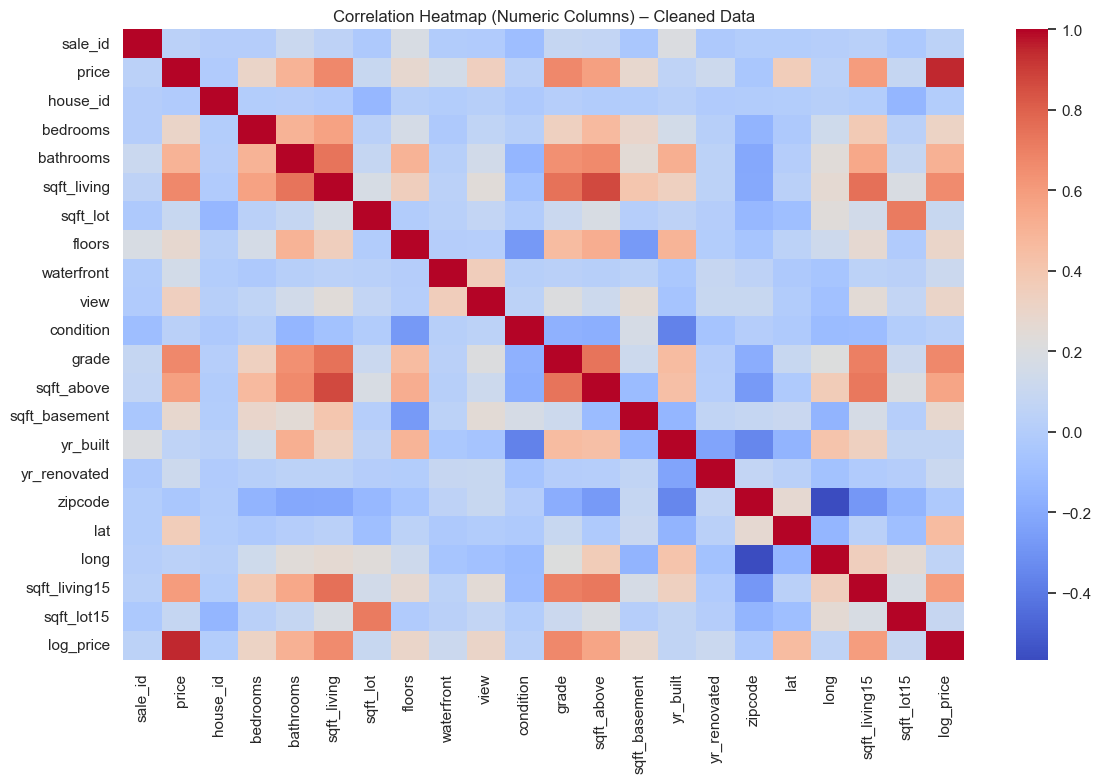

In [107]:
plt.figure(figsize=(12,8))
numeric_cols = df_clean.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns) – Cleaned Data")
plt.tight_layout()
plt.show()

In [108]:
price_corr = numeric_cols.corr()['price'].sort_values(ascending=False)
price_corr

price            1.000
log_price        0.948
grade            0.675
sqft_living      0.673
sqft_living15    0.598
sqft_above       0.578
bathrooms        0.499
lat              0.358
view             0.343
bedrooms         0.307
sqft_basement    0.280
floors           0.272
waterfront       0.151
yr_renovated     0.122
sqft_lot         0.098
sqft_lot15       0.088
yr_built         0.054
long             0.039
sale_id          0.035
condition        0.032
house_id        -0.014
zipcode         -0.043
Name: price, dtype: float64

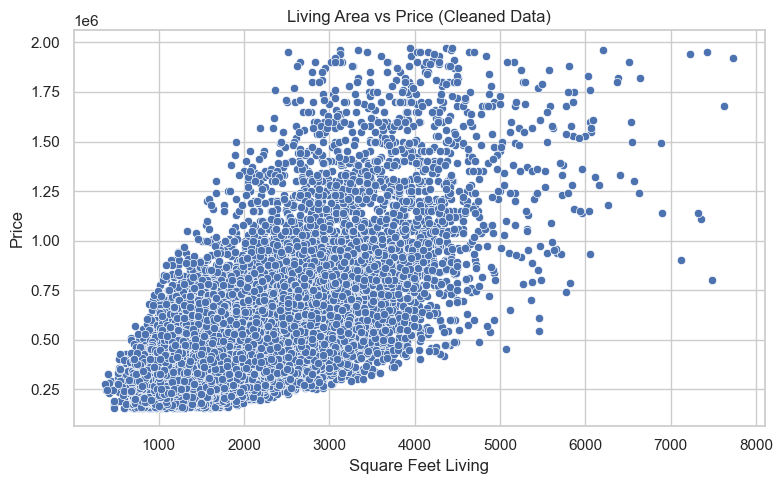

In [109]:
sns.scatterplot(data=df_clean, x="sqft_living", y="price")
plt.title("Living Area vs Price (Cleaned Data)")
plt.xlabel("Square Feet Living")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

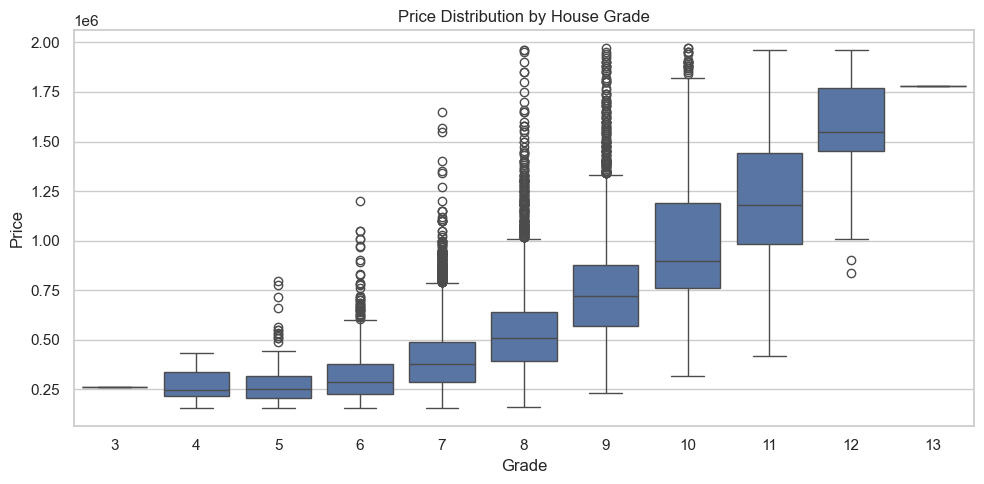

grade
13   1780000.000
12   1550000.000
11   1180000.000
10    898500.000
9     720000.000
8     510000.000
7     375000.000
6     285000.000
3     262000.000
5     250000.000
Name: price, dtype: float64

In [114]:
#Grade vs price (boxplot + median):
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x="grade", y="price")
plt.title("Price Distribution by House Grade")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

df_clean.groupby("grade")["price"].median().sort_values(ascending=False).head(10)

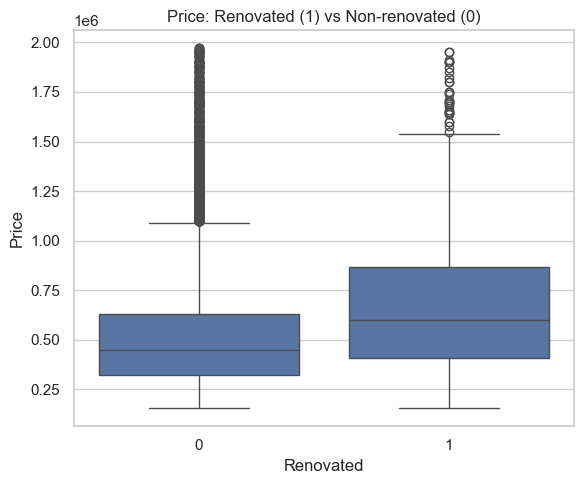

is_renovated
0   449500.000
1   599000.000
Name: price, dtype: float64

In [115]:
#Renovated vs non-renovated:
df_clean['is_renovated'] = np.where(df_clean['yr_renovated'] > 0, 1, 0)

plt.figure(figsize=(6, 5))
sns.boxplot(data=df_clean, x="is_renovated", y="price")
plt.title("Price: Renovated (1) vs Non-renovated (0)")
plt.xlabel("Renovated")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

df_clean.groupby("is_renovated")["price"].median()


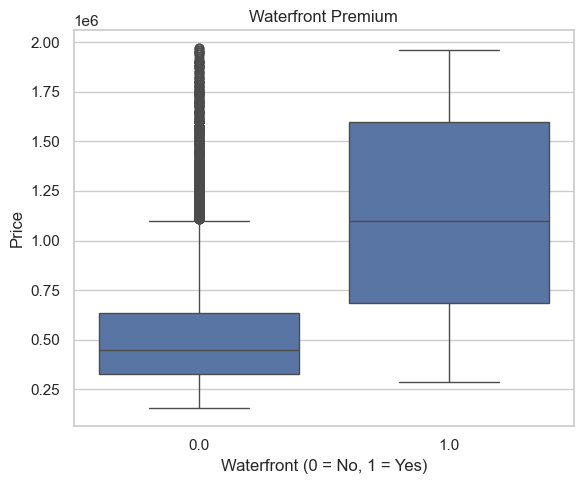

waterfront
0.000    450000.000
1.000   1100000.000
Name: price, dtype: float64

In [116]:
#Waterfront vs non-waterfront:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_clean, x="waterfront", y="price")
plt.title("Waterfront Premium")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

df_clean.groupby("waterfront")["price"].median()


In [117]:
#Top ZIP codes by median price (for geographic insight)
zip_median = df_clean.groupby("zipcode")["price"].median().sort_values(ascending=False)
zip_median.head(10)

zipcode
98039   1450000.000
98004   1020000.000
98040    975000.000
98112    852500.000
98005    765475.000
98006    751305.000
98075    739888.000
98109    736000.000
98119    721500.000
98102    690000.000
Name: price, dtype: float64

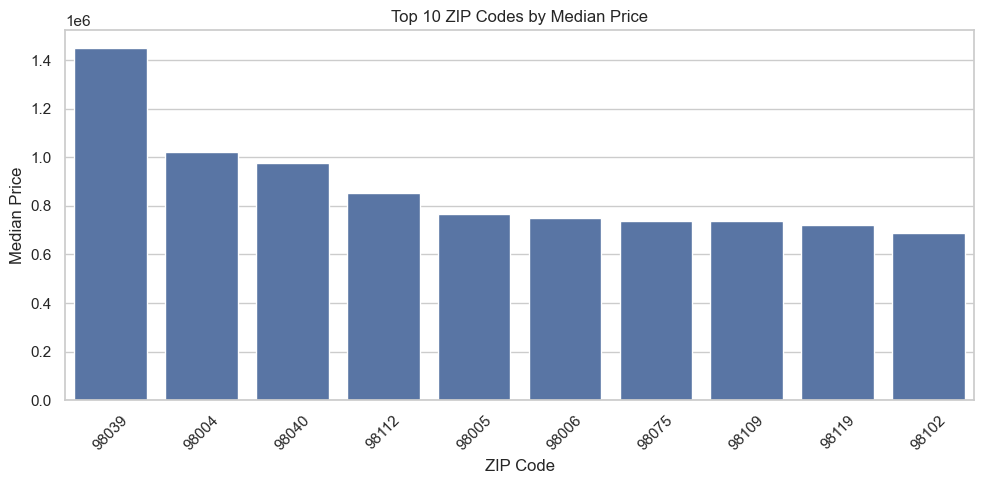

In [118]:
#as a barplot for ZIP Codes
top_zips = zip_median.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_zips.index.astype(str), y=top_zips.values)
plt.title("Top 10 ZIP Codes by Median Price")
plt.xlabel("ZIP Code")
plt.ylabel("Median Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Back to the Hypotheses

We now return to the research questions defined earlier and evaluate each using the cleaned dataset.

---

### H1 – Size and Price

**Result: Confirmed.**  
- `sqft_living` is one of the strongest predictors of price.  
- Bathrooms also display a positive relationship with price.  
- Scatter and correlation analysis both support these findings.

---

### H2 – Renovation and Grade

**Result: Confirmed.**  
- Renovated homes show a meaningful price premium.  
- Grade is highly predictive of price: higher-grade homes consistently cluster at higher median values.

---

### H3 – Geography and Price

**H3.1 ZIP code clusters — Confirmed**  
A small set of ZIP codes forms a premium tier with significantly higher median prices.

**H3.2 Geographic position (lat/long) — Directional support**  
Spatial scatterplots reveal clusters of high-priced homes around certain geographic coordinates.

**H3.3 Waterfront premium — Strongly confirmed**  
Waterfront properties form a distinct luxury band with median prices more than double non-waterfront homes.


## 7. Fine Tune

### What was improved
- Removed redundant plots and code that used the raw dataset `df`.
- Ensured all relationship plots use the cleaned dataset `df_clean`.
- Standardised plot titles, axis labels, and layout (`tight_layout()`).
- Added short explanations under key plots to highlight the main takeaway.
- Ordered the notebook to follow the EDA flow: Understanding → Hypotheses → Explore → Clean → Relationships → Interpretation → Insights.

### Why this matters
The goal is a notebook that:
- Is easy for a non-technical client to follow.
- Clearly shows how the conclusions were derived from the data.
- Is clean enough to support a 10-minute presentation without confusion or noise.

### Notes on Plot Cleanup

- Removed the earlier scatterplot that used the unprocessed dataframe because it no longer matched the cleaned and transformed dataset.
- Replaced it with the correct scatterplot based on the final feature set to keep the analysis consistent and reproducible.
- The updated plot shows the relationship between `sqft_living` and `price` more clearly after outlier handling and trimming.
- Key learning: EDA notebooks should only show finalized analytical steps; outdated or incorrect plots should be removed to avoid confusing the reader.

## 8. Explain – Insights & Recommendations  
### Client: Jennifer Montgomery (Buyer)

High budget, wants to show off, timing within a month, demands:
- waterfront,
- renovated,
- high grades,
- ability to resell within 1 year.

---

### Key Insights

1. **Size and grade are the strongest drivers of price.**  
   `sqft_living` and `grade` show the strongest positive relationships with `price`.  
   Large, high-grade houses typically sit in the top price segments and represent the “showpiece” properties Jennifer is after.

2. **Renovated properties attract a clear price premium.**  
   Homes with `yr_renovated > 0` have higher median prices than non-renovated homes, especially in central and high-demand ZIP codes.  
   For Jennifer, this confirms that “fully done” properties are positioned firmly in the premium segment.

3. **Waterfront is a separate luxury tier.**  
   Waterfront properties (`waterfront == 1`) form a distinct price band far above the median for non-waterfront homes.  
   This matches Jennifer’s high-budget profile, but also means she must be selective to avoid overpaying for status over fundamentals.

4. **Only a small set of ZIP codes combines high price, high grade, and strong resale potential.**  
   The top ZIP codes by median price tend to have:
   - higher-grade homes,
   - desirable geographic location (lat/long),
   - and stronger demand.  
   These are the most promising areas for a 1-year resale horizon.

---

### Geographic Insight

The data shows a “premium belt” of ZIP codes where:
- median prices are significantly above the county average,
- a higher proportion of houses are high grade,
- and waterfront or near-waterfront locations are common.

These ZIP codes are the natural target zone for Jennifer’s search:
- They deliver the “show off” effect she wants (waterfront, size, grade),
- while offering the best chance of strong resale interest within one year.

---

### Recommendations for Jennifer Montgomery

#### 1. Focus on **high-grade, waterfront properties in premium ZIP codes**
- Target houses with:
  - Grade in the upper range (e.g. 9–13, depending on your actual distribution),
  - Waterfront = 1 or direct proximity to water,
  - Large `sqft_living` (top quartile for the chosen ZIP).  
- These properties sit where the data shows the highest price and strongest demand.

**Rationale:**  
Grade and waterfront both have strong positive associations with price. Combining them in high-demand ZIPs maximizes status and resale potential.

---

#### 2. Prefer **recently renovated** over “project” properties  
- Filter for houses with `yr_renovated > 0`, ideally with recent renovation years.  
- Avoid heavy renovation projects – they add execution risk and time, which clashes with a 1-year resale target.

**Rationale:**  
The dataset shows a price premium for renovated homes, especially in premium neighborhoods. Jennifer is buying at the top of the market; buyers in 12 months will expect “turn-key” condition.

---

#### 3. Pay for **quality and location**, not for extreme lot size  
- Prioritize:
  - strong interior size (`sqft_living`),
  - high grade,
  - and waterfront / premium ZIP code,  
  over very large lots (`sqft_lot`).

**Rationale:**  
`sqft_living` and `grade` correlate much more strongly with price than lot size. For a showcase property with resell in mind, the market values living space and finish more than raw land.

---

#### 4. Stay inside the **top ZIP cluster**, not on the fringe  
- Use your top ZIP code median-price table to:
  - Select the upper cluster of ZIPs (e.g. top 5–10 by median price),
  - Avoid marginal areas where demand is weaker or inconsistent.

**Rationale:**  
For a 1-year resale window, liquidity matters.  
Premium ZIPs with high transaction volumes and high medians are safer than isolated “one-off” luxury properties.

---

#### 5. Build in a **resale margin buffer**  
- Even with a high budget, Jennifer should target:
  - Properties that are **aligned** with the top of the market,  
  - Not absurd outliers far above even the top ZIP medians.

**Rationale:**  
Buying just *below* the extreme top of the segment leaves room for a profitable resale if the market flattens or dips slightly in the next 12 months.

---

### Summary for Jennifer

Given her profile and the EDA:

- Jennifer should buy a **large, high-grade, recently renovated waterfront home**  
  in one of the **top median-price ZIP codes**,  
- with strong `sqft_living`, solid renovation quality, and no need for major projects,  
- priced in line with, not wildly above, other high-end sales in the same ZIP.

This strategy delivers:
- High status (“show off” factor),
- A property aligned with observed price drivers (size, grade, renovation, waterfront),
- And a realistic path to resale within roughly one year.